# Endpoint Data Analysis

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

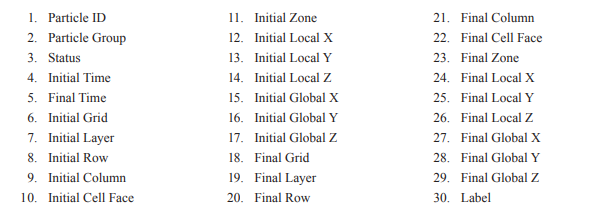

In [2]:
Image('endpoint.png')

## 1. Define Variables

In [3]:
skiprows =[]
for i in range(0,22):
    skiprows.append(i)
names = ["Particle ID",
         "Particle Group",
         "Status",
         "Initial Time",
         "Final Time",
         "Initial Grid",
         "Initial Layer",
         "Initial Row",
         "Initial Column",
         "Initial Cell Face",
         "Initial Zone",
         "Initial Local X",
         "Initial Local Y",
         "Initial Local Z",
         "Initial Global X",
         "Initial Global Y",
         "Initial Global Z",
         "Final Grid",
         "Final Layer",
         "Final Row",
         "Final Column",
         "Final Cell Face",
         "Final Zone",
         "Final Local X",
         "Final Local Y",
         "Final Local Z",
         "Final Global X",
         "Final Global Y",
         "Final Global Z",
         "Label"]
columns = {"HEADER": names[0]}
for i in range(1,30):
    columns["Unnamed: "+str(i+1)] = names[i]
#print(columns)

## 2. Example

In [4]:
df = pd.read_fwf('mf-data-weekly-grid/79model.end',
                 skiprows = skiprows
                ).dropna(axis = 1)
df = df.rename(index=str, columns=columns)
df = df.loc[(df['Final Layer'] == 8) & (df['Final Column'] == 42) ]
df = df.sort_values(['Final Time'])
x = []
for i in range(0,len(df['Status'])):
    x.append(i+1)
df['number'] = x
df

,Particle ID,Particle Group,Status,Initial Time,Final Time,Initial Grid,Initial Layer,Initial Row,Initial Column,Initial Cell Face,...,Final Cell Face,Final Zone,Final Local X,Final Local Y,Final Local Z,Final Global X,Final Global Y,Final Global Z,Label,number
209,210,3,2,0.0,85.683735,1,1,1,33,4,...,1,1,0.000000,0.999,0.872393,410.000000,0.999,6.320245,GHB2,1
193,194,3,2,0.0,85.683735,1,1,1,33,3,...,1,1,0.000000,0.001,0.872393,410.000000,0.001,6.320245,GHB2,2
208,209,3,2,0.0,85.738772,1,1,1,33,4,...,1,1,0.000000,0.999,0.727309,410.000000,0.999,3.273485,GHB2,3
192,193,3,2,0.0,85.738772,1,1,1,33,3,...,1,1,0.000000,0.001,0.727309,410.000000,0.001,3.273485,GHB2,4
213,214,3,2,0.0,85.917699,1,1,1,33,4,...,1,1,0.000000,0.999,0.872934,410.000000,0.999,6.331605,GHB2,5
197,198,3,2,0.0,85.917699,1,1,1,33,3,...,1,1,0.000000,0.001,0.872934,410.000000,0.001,6.331605,GHB2,6
212,213,3,2,0.0,85.969773,1,1,1,33,4,...,1,1,0.000000,0.999,0.729566,410.000000,0.999,3.320884,GHB2,7
196,197,3,2,0.0,85.969773,1,1,1,33,3,...,1,1,0.000000,0.001,0.729566,410.000000,0.001,3.320884,GHB2,8
96,97,2,2,0.0,86.046232,1,1,1,32,2,...,1,1,0.000000,0.125,0.668810,410.000000,0.125,2.045021,GHB1,9
98,99,2,2,0.0,86.046232,1,1,1,32,2,...,1,1,0.000000,0.625,0.668810,410.000000,0.625,2.045021,GHB1,10


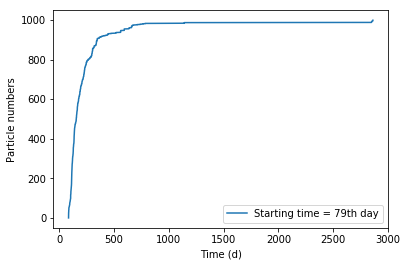

In [5]:
plt.plot(df['Final Time'],df['number'], label = 'Starting time = 79th day')
plt.xlabel('Time (d)')
plt.ylabel('Particle numbers')
plt.legend()

## 3. Plot all the endpoints

### 3.1 For MT3DMS

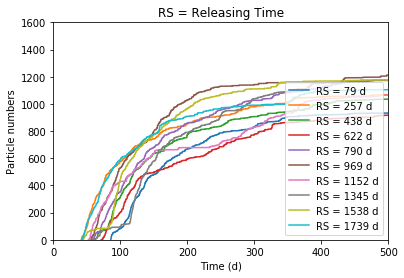

In [6]:
filename =[]
for i in [79,257,438,622,790,969,1152,1345,1538,1739]:
    filename.append('mf-data-weekly-grid/'+str(i)+'model.end')
for f in filename:
    df = pd.read_fwf(f,
                 skiprows = skiprows
                ).dropna(axis = 1)
    df = df.rename(index=str, columns=columns)
    df = df.loc[(df['Final Layer'] == 8) & (df['Final Column'] == 42) ]
    df = df.sort_values(['Final Time'])
    x = []
    for i in range(0,len(df['Status'])):
        x.append(i+1)
    df['number'] = x
    plt.plot(df['Final Time'],df['number'], label = 'RS = '+ f[20:-9] + ' d')
    plt.title('RS = Releasing Time')
    plt.xlabel('Time (d)')
    plt.ylabel('Particle numbers')
    plt.legend() 
    plt.xlim(0,500)
    plt.ylim(0,1600)

### 3.2 For SEAWAT

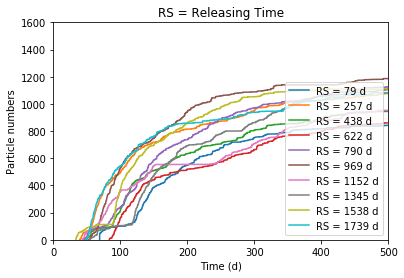

In [7]:
filename_s =[]
for i in [79,257,438,622,790,969,1152,1345,1538,1739]:
    filename_s.append('mf-data-weekly-grid-seawat/'+str(i)+'model.end')
for f in filename_s:
    df = pd.read_fwf(f,
                 skiprows = skiprows
                ).dropna(axis = 1)
    df = df.rename(index=str, columns=columns)
    df = df.loc[(df['Final Layer'] == 8) & (df['Final Column'] == 42) ]
    df = df.sort_values(['Final Time'])
    x = []
    for i in range(0,len(df['Status'])):
        x.append(i+1)
    df['number'] = x
    plt.plot(df['Final Time'],df['number'], label = 'RS = '+ f[27:-9] + ' d')
    plt.title('RS = Releasing Time')
    plt.xlabel('Time (d)')
    plt.ylabel('Particle numbers')
    plt.legend() 
    plt.xlim(0,500)
    plt.ylim(0,1600)

### 3.3 Comparison

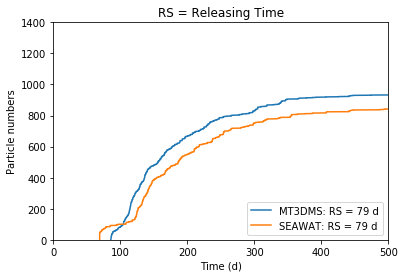

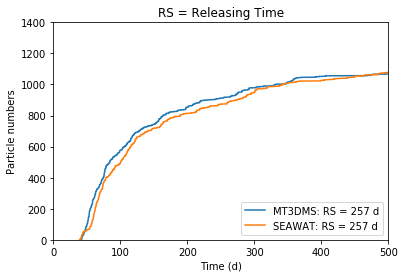

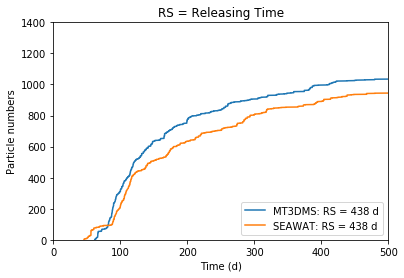

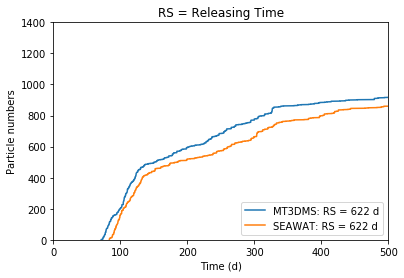

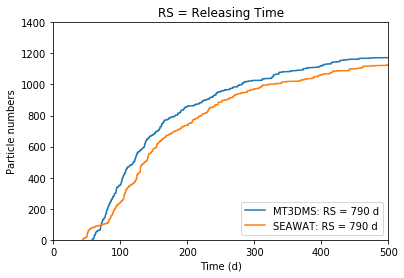

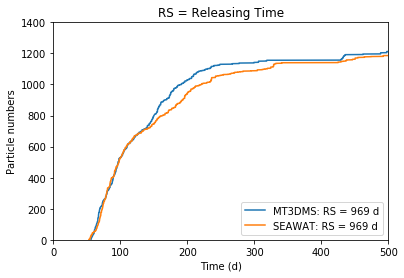

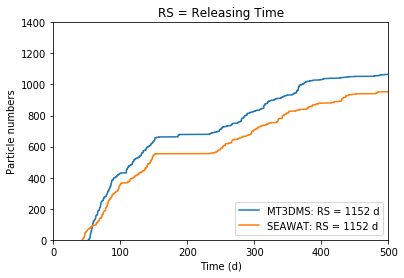

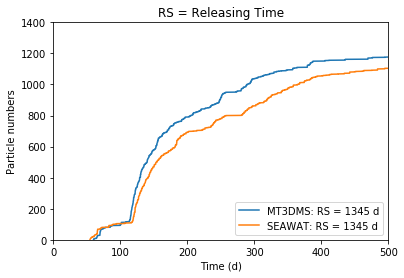

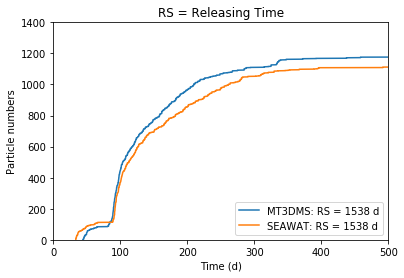

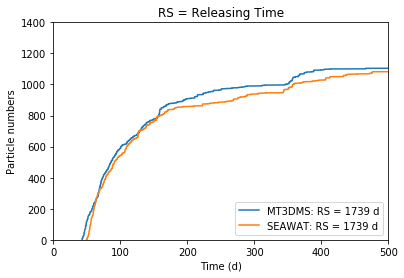

In [8]:
for f in range(0, len(filename)):
    df = pd.read_fwf(filename[f],
                 skiprows = skiprows
                ).dropna(axis = 1)
    df = df.rename(index=str, columns=columns)
    df = df.loc[(df['Final Layer'] == 8) & (df['Final Column'] == 42) ]
    df = df.sort_values(['Final Time'])
    x = []
    for i in range(0,len(df['Status'])):
        x.append(i+1)
    df['number'] = x
    
    df1 = pd.read_fwf(filename_s[f],
                 skiprows = skiprows
                ).dropna(axis = 1)
    df1 = df1.rename(index=str, columns=columns)
    df1 = df1.loc[(df1['Final Layer'] == 8) & (df1['Final Column'] == 42) ]
    df1 = df1.sort_values(['Final Time'])
    x = []
    for i in range(0,len(df1['Status'])):
        x.append(i+1)
    df1['number'] = x
   
    plt.plot(df['Final Time'],df['number'], label = 'MT3DMS: RS = '+ filename[f][20:-9] + ' d')
    plt.plot(df1['Final Time'],df1['number'], label = 'SEAWAT: RS = '+ filename_s[f][27:-9] + ' d')
    plt.title('RS = Releasing Time')
    plt.xlabel('Time (d)')
    plt.ylabel('Particle numbers')
    plt.legend(loc='lower right') 
    plt.xlim(0,500)
    plt.ylim(0,1400)
    plt.show()